In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Chargement du jeu de données CIFAR-10
# CIFAR-10 contient 60 000 images couleur de 32x32 pixels réparties en 10 classes
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


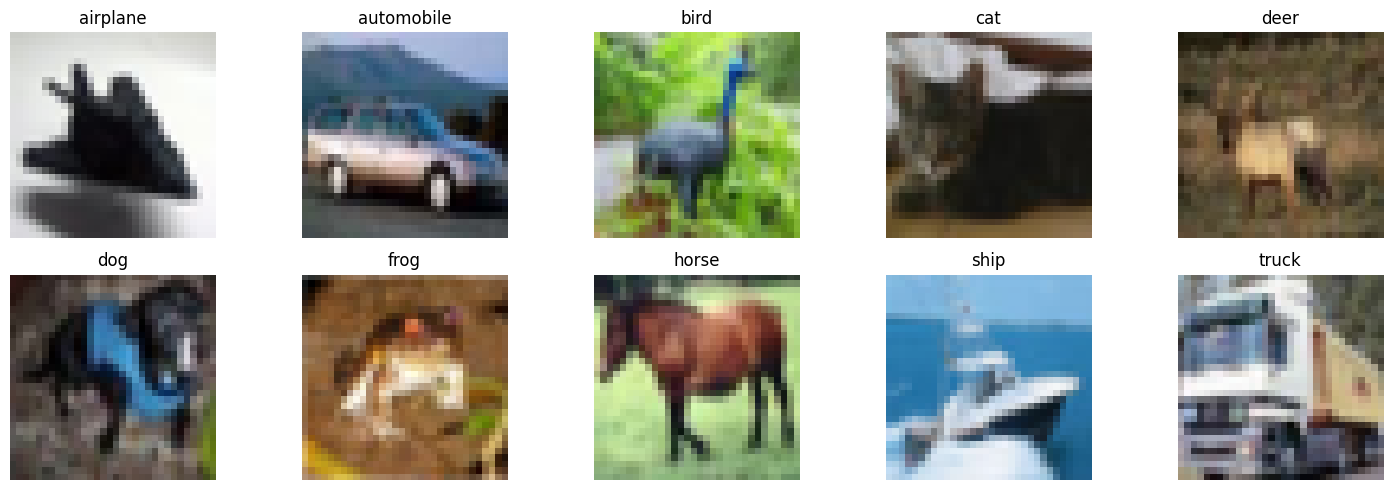

In [3]:
# Noms des classes de CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Configuration de la visualisation
plt.figure(figsize=(15, 5))

# Afficher 10 images (une par classe)
for i in range(10):
    # Sélectionner un index où le label correspond à la classe
    idx = np.where(y_train == i)[0][0]

    # Créer un sous-graphique
    plt.subplot(2, 5, i+1)

    # Afficher l'image
    plt.imshow(x_train[idx])

    # Ajouter le titre avec le nom de la classe
    plt.title(class_names[i])

    # Supprimer les axes
    plt.axis('off')

# Ajuster automatiquement la disposition des sous-graphiques
plt.tight_layout()

# Afficher la figure
plt.show()

In [4]:
# Normalisation des données
# Conversion des valeurs de pixels de [0-255] à [0-1] pour améliorer la convergence
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Transformation des labels pour correspondre au format sparse_categorical_crossentropy
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [5]:
# Construction de l'architecture du réseau de neurones convolutif (CNN)
model = Sequential([
   # Première couche de convolution
   # 32 filtres de taille 3x3, activation ReLU, spécifiant la forme d'entrée pour la première couche
   Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),

   # Première couche de pooling
   # Réduit la dimensionnalité de moitié, conservant les caractéristiques les plus importantes
   MaxPooling2D((2, 2)),

   # Deuxième couche de convolution
   # 64 filtres de taille 3x3, activation ReLU pour extraire des caractéristiques plus complexes
   Conv2D(64, (3, 3), activation='relu'),

   # Deuxième couche de pooling
   # Nouvelle réduction de la dimensionnalité
   MaxPooling2D((2, 2)),

   # Couche de flattening
   # Transforme les données 2D en vecteur 1D pour les couches fully connected
   Flatten(),

   # Couche dense (fully connected)
   # 64 neurones avec activation ReLU pour l'apprentissage de représentations abstraites
   Dense(64, activation='relu'),

   # Couche de sortie
   # 10 neurones correspondant aux 10 classes de CIFAR-10, activation softmax pour générer des probabilités
   Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compilation du modèle
# Configuration de l'algorithme d'optimisation, de la fonction de perte et des métriques
model.compile(
   optimizer='adam',             # Algorithme d'optimisation adaptatif
   loss='sparse_categorical_crossentropy',  # Fonction de perte adaptée à la classification multi-classe
   metrics=['accuracy']          # Métrique pour évaluer les performances du modèle
)

In [7]:
# Entraînement du modèle
# Apprentissage sur les données d'entraînement avec validation sur les données de test
history = model.fit(
   x_train, y_train,              # Données et labels d'entraînement
   epochs=10,                     # Nombre de passages sur l'ensemble du jeu de données
   validation_data=(x_test, y_test)  # Données utilisées pour la validation pendant l'entraînement
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3783 - loss: 1.7111 - val_accuracy: 0.5580 - val_loss: 1.2353
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.5929 - loss: 1.1525 - val_accuracy: 0.6231 - val_loss: 1.0786
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6519 - loss: 1.0010 - val_accuracy: 0.6611 - val_loss: 0.9747
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.6874 - loss: 0.8942 - val_accuracy: 0.6670 - val_loss: 0.9584
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7147 - loss: 0.8207 - val_accuracy: 0.6726 - val_loss: 0.9440
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7349 - loss: 0.7629 - val_accuracy: 0.6843 - val_loss: 0.9256
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7543 - loss: 0.7015 - val_accuracy: 0.6873 - val_loss: 0.9081
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.7709 -

In [8]:
# Évaluation du modèle sur les données de test
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Précision sur le jeu de test : {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7078 - loss: 0.9145
Précision sur le jeu de test : 70.29%


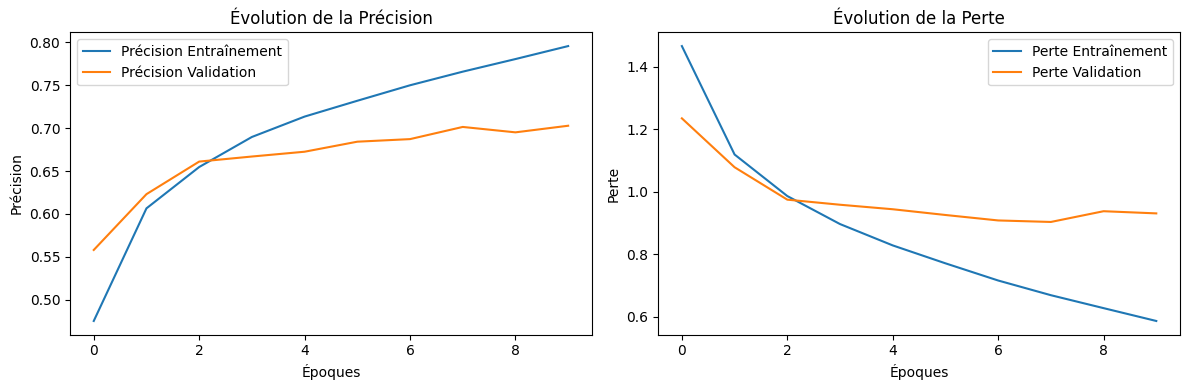

In [9]:
# Visualisation des courbes d'apprentissage
plt.figure(figsize=(12, 4))

# Sous-graphique de la précision
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Précision Entraînement')
plt.plot(history.history['val_accuracy'], label='Précision Validation')
plt.title('Évolution de la Précision')
plt.xlabel('Époques')
plt.ylabel('Précision')
plt.legend()

# Sous-graphique de la perte
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perte Entraînement')
plt.plot(history.history['val_loss'], label='Perte Validation')
plt.title('Évolution de la Perte')
plt.xlabel('Époques')
plt.ylabel('Perte')
plt.legend()

# Ajustement automatique de la disposition
plt.tight_layout()

# Affichage des graphiques
plt.show()